Original work [here](https://colab.research.google.com/github/tvhahn/Beautiful-Plots/blob/master/Decision%20Boundary/decision-boundary.ipynb#scrollTo=6G6F84esEiap) by [@timothyvh](https://twitter.com/timothyvh?s=09) on Twitter. Check out his [blog post](https://www.tvhahn.com/posts/beautiful-plots-decision-boundary/)!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.ticker import MaxNLocator # needed for integer only on axis
from matplotlib.lines import Line2D # for creating the custom legend
import warnings

In [ ]:
iris = datasets.load_iris()
X = iris.data[:,0:2]
y = iris.target

# print the shape of the data to
# better understand it
print('X.shape:', X.shape)
print('y.shape', y.shape)

X.shape: (150, 2)
y.shape (150,)


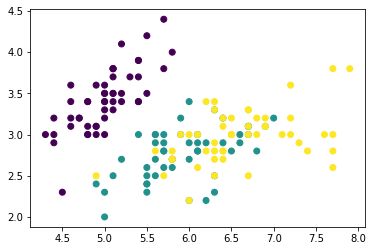

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

## Function

In [ ]:
def plot_decision_boundary2D(clf, X: np.ndarray, y: np.ndarray, classes: list, colormap: np.ndarray,
                             step: float = 0.1, prob_dot_scale: int = 40, prob_dot_scale_power: int = 3,
                             true_dot_size: int = 50, pad: float = 1.0,
                             prob_values: list = [0.4, 0.6, 0.8, 1.0]) -> None:
    """
    Original work by @timothyvh on Twitter.
    Recreating an R ggplot decision boundary plotting in python using matplotlib. Note that this only works for 2D plotting.
    The goal of this function is to present a classifier's decision boundary in an easy to read, digestible way to ease
    communication and visualization of results. 
    
    Arguments:
    clf - the classifier we want to visualize the decision boundary for. This should work for any kind of relevant model.
    X - our data we want to plot. Note that since this is a 2D array, X should be 2-dimensional.
    y - the target labels for the data we want to plot
    classes - the names of the classes you are trying to identify, should be same shape as colormap
    colormap - the colors you want to use to indicate your different classes, should be same shape as classes
    step - mesh stepsize
    prob_dot_scale - modifier to scale the probability dots
    prob_dot_scale_power - exponential used to increase/decrease size of prob dots
    true_dot_size - size of the true labels
    pad - how much to "pad" around the true labels
    prob_values - list of probabilities to map the meshgrid predictions to

    Returns:
    None - This function will simply output a graph of the decision boundary
    """
    # Handling X data dimension issues. If X doesn't have enough dimensions, throw error. Too many, use first two dimensions.
    X_dim = X.shape[1]
    if X_dim < 2:
        raise Exception("Error: Not enough dimensions in input data. Data must be at least 2-dimensional.")
    elif X_dim > 2: 
        warnings.warn(f"Warning: input data was {X_dim} dimensional. Expected 2. Using first 2 dimensions provided.")
    
    # Change colormap to a numpy array if it isn't already (necessary to prevent scalar error)
    if not isinstance(colormap, np.ndarray):
        colormap = np.array(colormap)        
        
    # create the x0, x1 feature. This is only a 2D plot after all. 
    x0 = X[:,0]
    x1 = X[:,1]
    
    # create 1D arrays representing the range of probability data points
    x0_min, x0_max = np.round(x0.min())-pad, np.round(x0.max()+pad)
    x1_min, x1_max = np.round(x1.min())-pad, np.round(x1.max()+pad)    
    x0_axis_range = np.arange(x0_min,x0_max, step)
    x1_axis_range = np.arange(x1_min,x1_max, step)
    
    # create meshgrid between the two axis ranges
    xx0, xx1 = np.meshgrid(x0_axis_range, x1_axis_range)
    
    # put the xx in the same dimensional format as the original X
    xx = np.reshape(np.stack((xx0.ravel(),xx1.ravel()),axis=1),(-1,2))
    
    yy_hat = clf.predict(xx) # prediction of all the little dots
    yy_prob = clf.predict_proba(xx) # probability of each dot being 
                                    # the predicted color
    yy_size = np.max(yy_prob, axis=1)
    
    # make figure
    plt.style.use('seaborn-whitegrid') # set style because it looks nice
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), dpi=150)
    
    # plot all the little dots
    ax.scatter(xx[:,0], xx[:,1], c=colormap[yy_hat], alpha=0.4, s=prob_dot_scale*yy_size**prob_dot_scale_power, linewidths=0,)
    
    # plot the contours
    ax.contour(x0_axis_range, x1_axis_range, 
               np.reshape(yy_hat,(xx0.shape[0],-1)), 
               levels=3, linewidths=1, 
               colors=[colormap[0],colormap[1], colormap[1], colormap[2],])
 
    # plot the original x values.
    ax.scatter(x0, x1, c=colormap[y], s=true_dot_size, zorder=3, linewidths=0.7, edgecolor='k')
 
    # create legends - Not sure if these serve a purpose but I left them in just in case
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
 
    ax.set_ylabel(r"$x_1$")
    ax.set_xlabel(r"$x_0$")
    
    # set the aspect ratio to 1, for looks
    ax.set_aspect(1)
 
    # create class legend
    legend_class = []
    for class_id, color in zip(classes, colormap):
        legend_class.append(Line2D([0], [0], marker='o', label=class_id,ls='None',
                                   markerfacecolor=color, markersize=np.sqrt(true_dot_size), 
                                   markeredgecolor='k', markeredgewidth=0.7))
 
    # iterate over each of the probabilities to create prob legend
    legend_prob = []
    for prob in prob_values:
        legend_prob.append(Line2D([0], [0], marker='o', label=prob, ls='None', alpha=0.8,
                                  markerfacecolor='grey', 
                                  markersize=np.sqrt(prob_dot_scale*prob**prob_dot_scale_power), 
                                  markeredgecolor='k', markeredgewidth=0))
 
 
    legend1 = ax.legend(handles=legend_class, loc='center', 
                        bbox_to_anchor=(1.05, 0.35),
                        frameon=False, title='class')
 
    legend2 = ax.legend(handles=legend_prob, loc='center', 
                        bbox_to_anchor=(1.05, 0.65),
                        frameon=False, title='prob', )
 
    ax.add_artist(legend1) # add legend back after it disappears
 
    ax.set_yticks(np.arange(x1_min,x1_max, 1)) # I don't like the decimals
    ax.grid(False) # remove gridlines (inherited from 'seaborn-whitegrid' style)
 
    # only use integers for axis tick labels
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
 
    # remove first ticks from axis labels, for looks
    ax.set_xticks(ax.get_xticks()[1:-1])
    ax.set_yticks(np.arange(x1_min,x1_max, 1)[1:])
 
    plt.show()

## Messing With Classifiers

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_LR = LogisticRegression(random_state=0)
clf_LR.fit(X, y)

LogisticRegression(random_state=0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf_NB = MultinomialNB()
clf_NB.fit(X,y)

MultinomialNB()

In [ ]:
from sklearn import neighbors
N_NEIGHBORS = 15
clf_KNN = neighbors.KNeighborsClassifier(N_NEIGHBORS, weights='uniform')
clf_KNN.fit(X, y)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(max_depth=4, random_state=0)
clf_RF.fit(X, y)

RandomForestClassifier(max_depth=4, random_state=0)

In [ ]:
from sklearn import svm
clf_SVM = svm.SVC(probability=True)
clf_SVM.fit(X, y)

SVC(probability=True)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_LDA = LinearDiscriminantAnalysis()
clf_LDA.fit(X, y)

LinearDiscriminantAnalysis()

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_QDA = QuadraticDiscriminantAnalysis()
clf_QDA.fit(X, y)

QuadraticDiscriminantAnalysis()

In [ ]:
# establish colors and colormap
redish = '#d73027'
orangeish = '#fc8d59'
blueish = '#4575b4'
colormap = np.array([redish,blueish,orangeish])

#establish classes
classes = ['c','s','v']

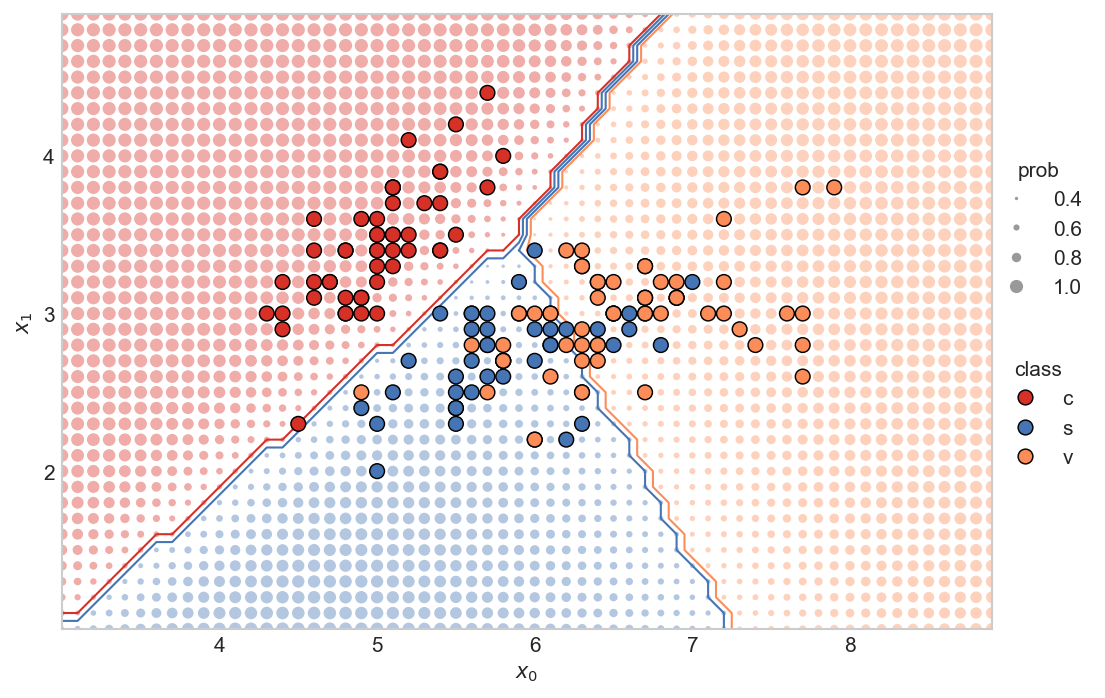

In [ ]:
plot_decision_boundary2D(clf_LR, X, y.copy(), classes, colormap)

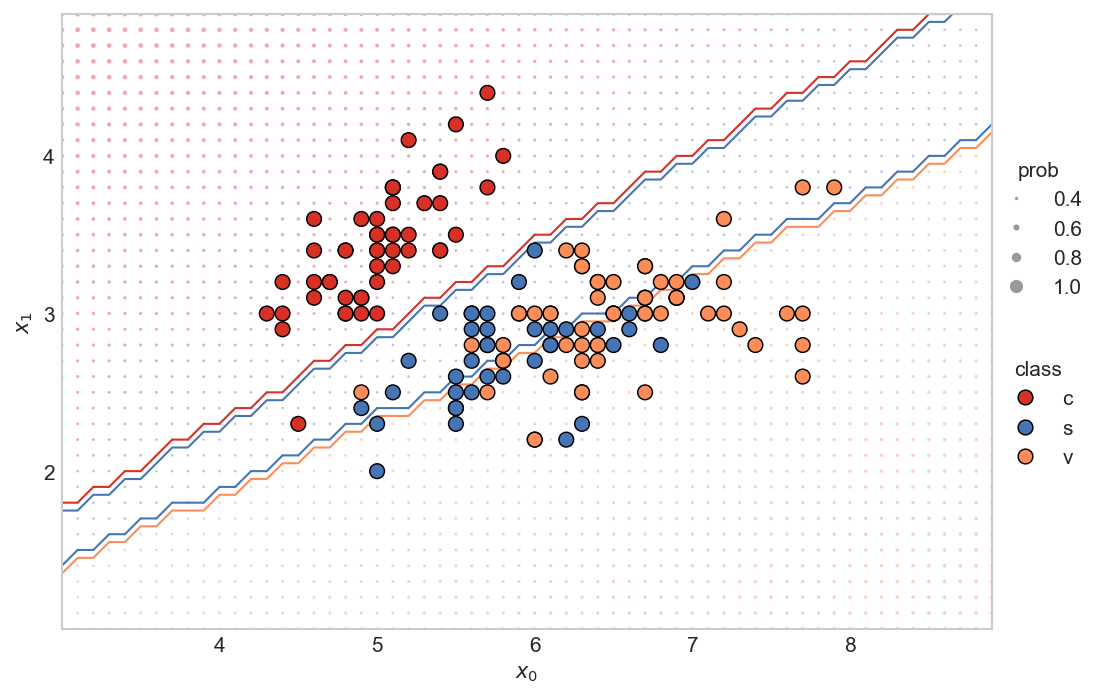

In [ ]:
plot_decision_boundary2D(clf_NB, X, y.copy(), classes, colormap)

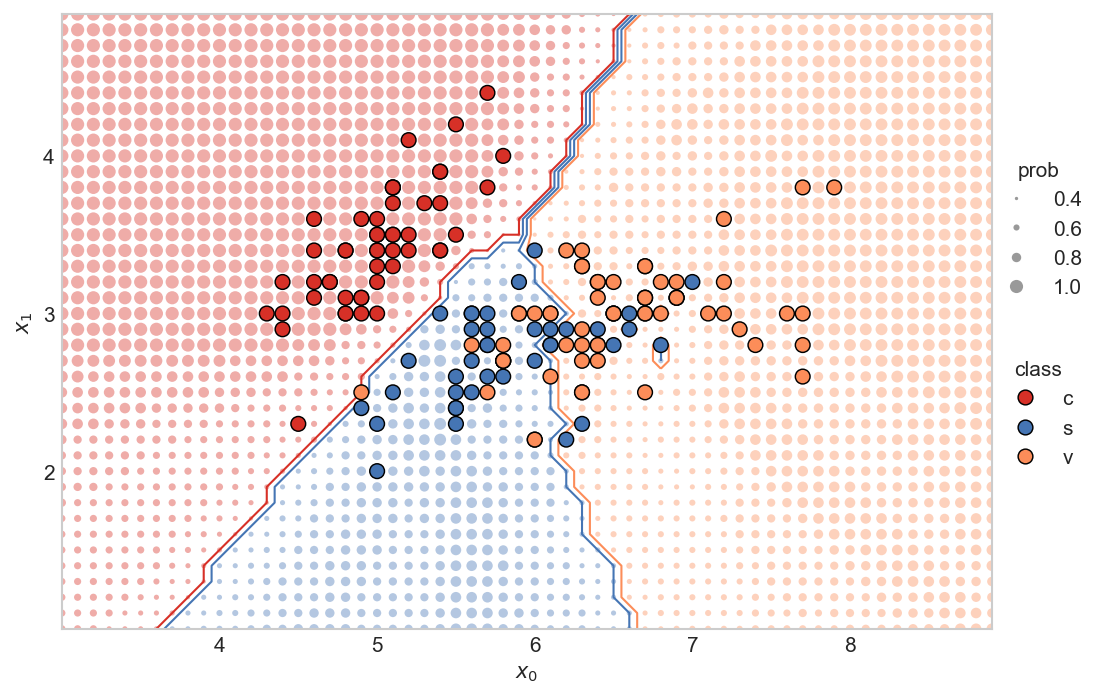

In [ ]:
plot_decision_boundary2D(clf_KNN, X, y.copy(), classes, colormap)

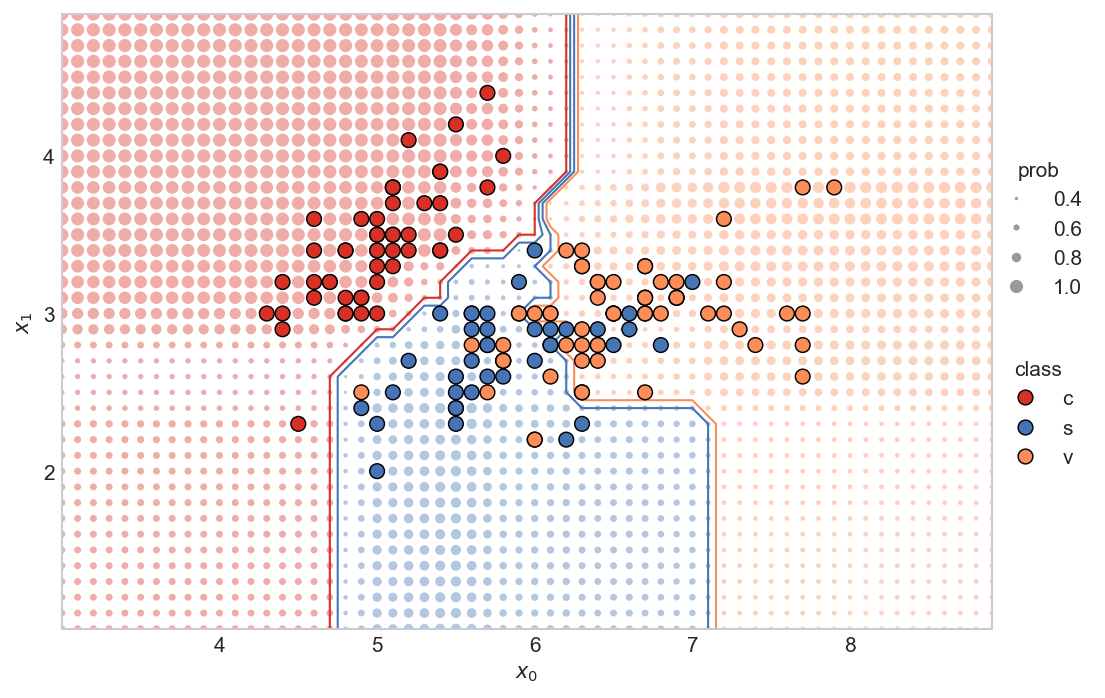

In [ ]:
plot_decision_boundary2D(clf_RF, X, y.copy(), classes, colormap)

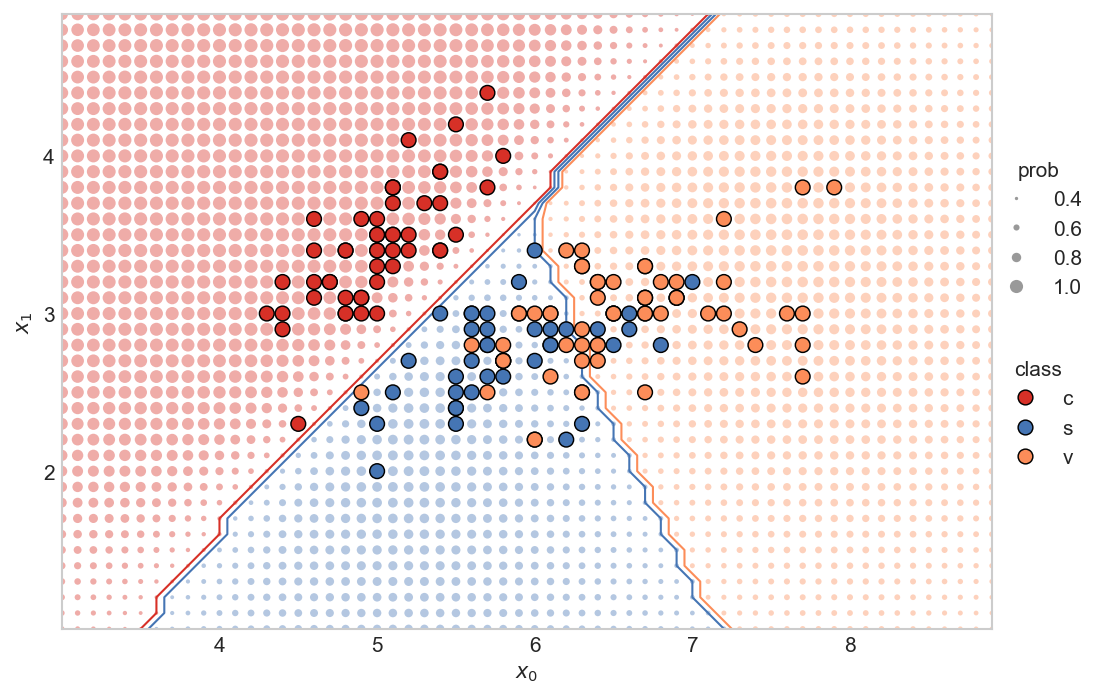

In [ ]:
plot_decision_boundary2D(clf_SVM, X, y.copy(), classes, colormap)

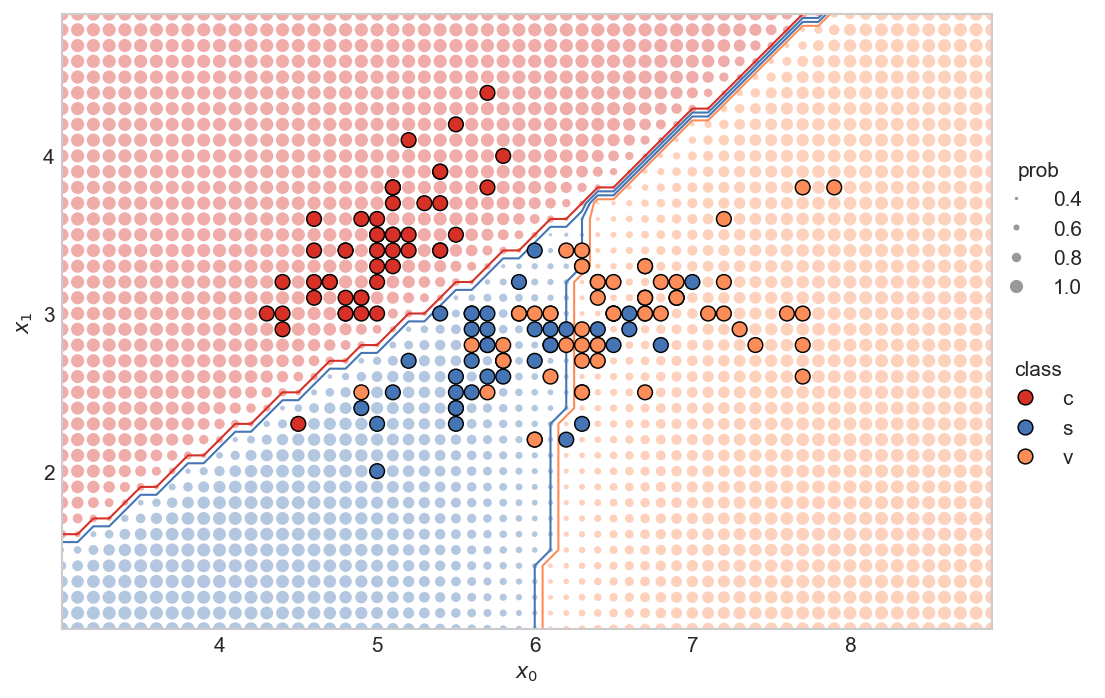

In [ ]:
plot_decision_boundary2D(clf_LDA, X, y.copy(), classes, colormap)

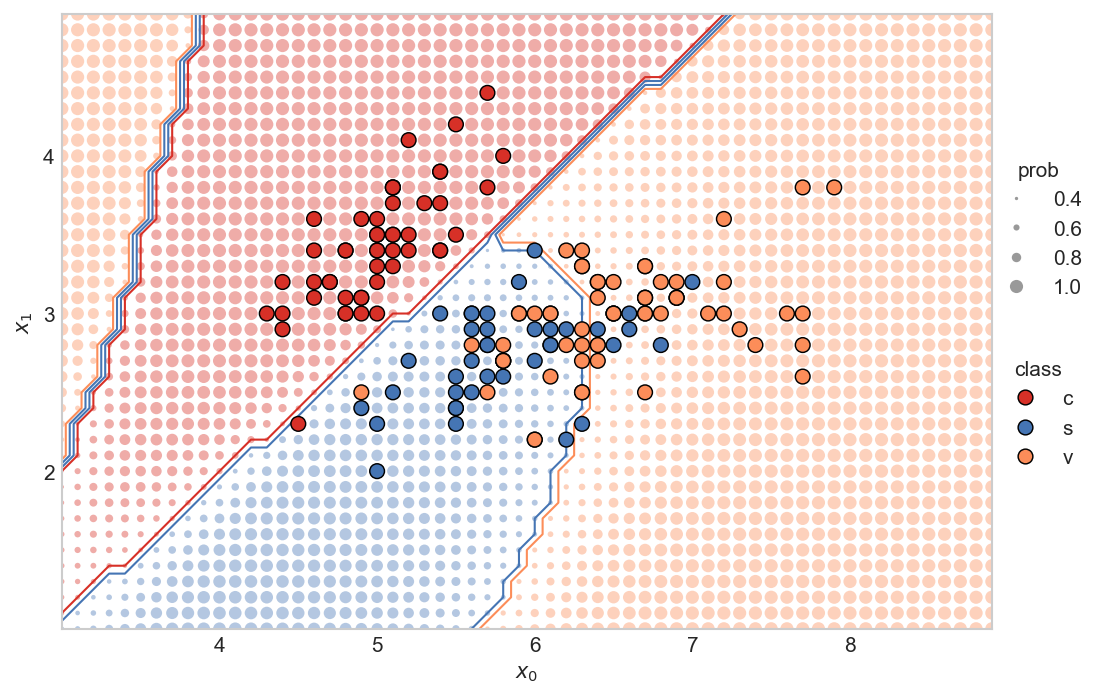

In [ ]:
plot_decision_boundary2D(clf_QDA, X, y.copy(), classes, colormap)